In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Mingu\AppData\Local\Temp\ipykernel_11256\776646990.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y)} hm³" for y in ax.get_yticks()], fontsize=9)


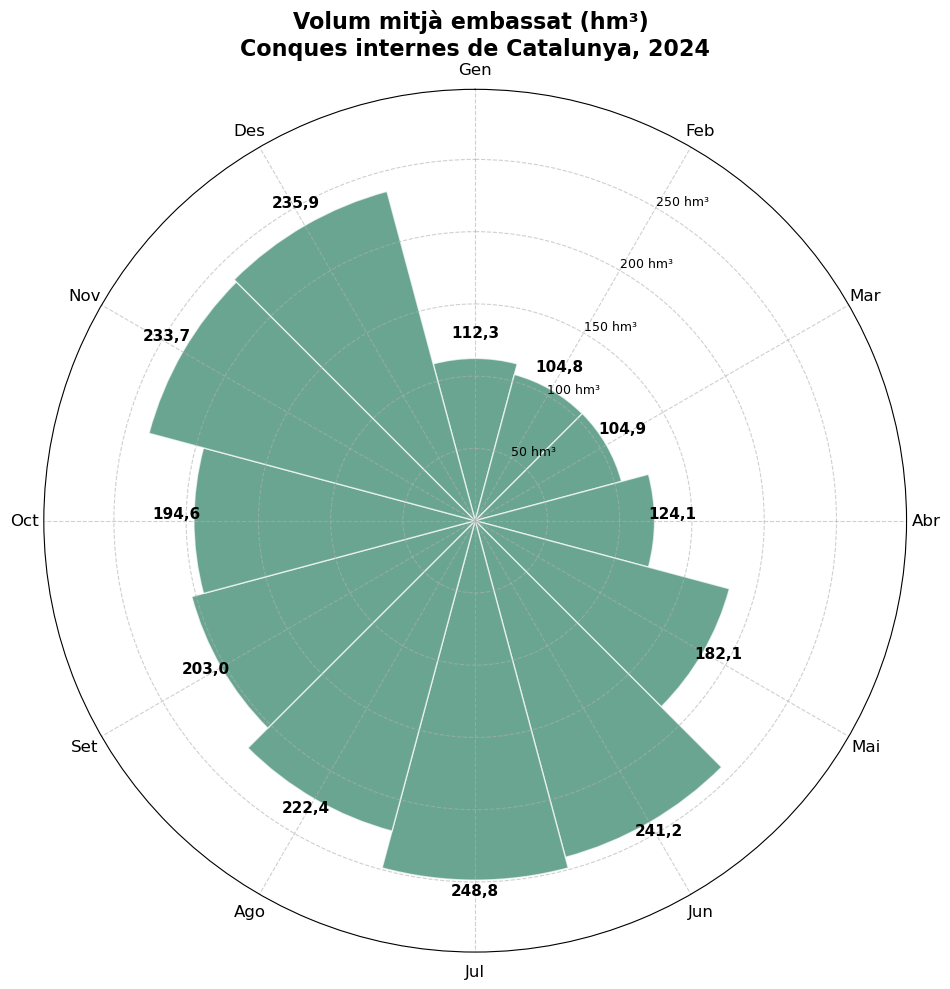

In [2]:
dades = pd.read_csv('Quantitat_d_aigua_als_embassaments_de_les_Conques_Internes_de_Catalunya_20250403.csv')

dades['Dia'] = pd.to_datetime(dades['Dia'], dayfirst=True)
dades2024 = dades[dades['Dia'].dt.year == 2024]
mitj_emb_mes = dades2024.groupby([dades2024['Dia'].dt.month, 'Estació'])['Volum embassat (hm3)'].mean().unstack()
suma_mes = mitj_emb_mes.sum(axis=1)

mesos = ['Gen', 'Feb', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Des']

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

theta = np.linspace(0, 2*np.pi, len(mesos), endpoint=False)
width = 2*np.pi / len(mesos)

color_barras = '#2a7f62'
bars = ax.bar(theta, suma_mes, width=width, 
             color=color_barras, alpha=0.7, edgecolor='white', linewidth=1)

ax.set_rlabel_position(30)
ax.set_yticklabels([f"{int(y)} hm³" for y in ax.get_yticks()], fontsize=9)
ax.set_ylim(0, max(suma_mes)*1.2)

ax.set_xticks(theta)
ax.set_xticklabels(mesos, fontsize=12)

ax.set_title('Volum mitjà embassat (hm³) \nConques internes de Catalunya, 2024', 
             pad=25, fontsize=16, fontweight='bold')

for angle, radi in zip(theta, suma_mes):
    valor = f"{radi:.1f}".replace('.', ',')
    ax.text(angle, radi+max(suma_mes)*0.05, valor,
           ha='center', va='bottom', 
           color='black', fontsize=11, fontweight='bold')

ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('nightingale-chart.png', dpi=300, bbox_inches='tight')
plt.show()